In [3]:
import pyspark as ps
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

spark = (ps.sql.SparkSession
         .builder
         .master('local[4]')
         .appName('Airline')
         .getOrCreate()
        )

sc = spark.sparkContext

In [4]:
sc

<SparkContext master=local[4] appName=Airline>

In [5]:
traffic_capacity_DF = spark.read.csv(('data/traffic_capacity_united_airlines.csv'), header = True, inferSchema = True)
# print schema
traffic_capacity_DF.printSchema()

# checking row count
print("line count: {}\n".format(traffic_capacity_DF.count()))

# leftover json code
#traffic_capacity_DF.show()

root
 |-- united_airlines_atlantic_operations: string (nullable = true)
 |-- column_b: string (nullable = true)
 |-- 1995: double (nullable = true)
 |-- 1996: double (nullable = true)
 |-- 1997: double (nullable = true)
 |-- 1998: double (nullable = true)
 |-- 1999: double (nullable = true)
 |-- 2000: double (nullable = true)
 |-- 2001: double (nullable = true)
 |-- 2002: double (nullable = true)
 |-- 2003: double (nullable = true)
 |-- 2004: double (nullable = true)
 |-- 2005: double (nullable = true)
 |-- 2006: double (nullable = true)
 |-- 2007: double (nullable = true)
 |-- 2008: double (nullable = true)
 |-- 2009: double (nullable = true)
 |-- 2010: double (nullable = true)
 |-- 2011: double (nullable = true)
 |-- 2012: double (nullable = true)
 |-- 2013: double (nullable = true)
 |-- 2014: double (nullable = true)
 |-- 2015: double (nullable = true)

line count: 163



In [6]:
traffic_capacity_P = traffic_capacity_DF.toPandas()
traffic_capacity_P

,united_airlines_atlantic_operations,column_b,1995,1996,1997,1998,1999,2000,2001,2002,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,A,Sum of Pax Rev (000),1.103895e+06,1.188588e+06,1.461725e+06,1.566074e+06,1.671073e+06,1.916004e+06,1.680954e+06,1.513551e+06,...,1.891233e+06,2.349367e+06,2.566369e+06,2.207124e+06,2.777733e+06,2.908332e+06,5.598990e+06,5.912698e+06,6.081694e+06,5.923328e+06
1,A,Sum of Total Rev (000),1.285806e+06,1.411618e+06,1.745057e+06,1.846367e+06,1.973406e+06,2.259621e+06,2.081382e+06,1.882611e+06,...,2.323475e+06,2.760066e+06,3.045488e+06,2.545343e+06,3.197001e+06,3.483182e+06,6.464567e+06,7.132308e+06,7.320420e+06,7.067635e+06
2,A,Sum of RPM,1.115750e+10,1.123796e+10,1.342377e+10,1.488869e+10,1.699434e+10,1.807443e+10,1.780717e+10,1.600836e+10,...,1.584716e+10,1.705964e+10,1.840422e+10,1.793814e+10,1.872760e+10,1.851261e+10,3.802756e+10,3.829762e+10,3.794501e+10,3.763260e+10
3,A,Sum of ASM,1.426304e+10,1.425632e+10,1.701971e+10,1.950090e+10,2.213394e+10,2.346862e+10,2.401068e+10,2.047527e+10,...,1.909524e+10,2.039795e+10,2.263653e+10,2.204298e+10,2.291324e+10,2.328286e+10,4.770773e+10,4.711108e+10,4.716426e+10,4.738903e+10
4,A,Sum of AC Op Expense (000),4.766990e+05,5.191770e+05,5.746860e+05,5.913820e+05,6.629330e+05,8.528770e+05,1.032794e+06,9.231780e+05,...,1.153134e+06,1.288624e+06,1.981389e+06,1.245481e+06,1.566690e+06,1.813815e+06,4.220105e+06,3.796569e+06,3.791089e+06,2.964763e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,None,Expense - Atlantic,7.813476e-02,7.711077e-02,8.074170e-02,8.452686e-02,9.289658e-02,1.031081e-01,1.212432e-01,1.210746e-01,...,1.333791e-01,1.423435e-01,1.692143e-01,1.759768e-01,1.902886e-01,1.929201e-01,2.407849e-01,2.212719e-01,2.230529e-01,2.136511e-01
159,None,Expense - Latin America,4.357985e-02,4.566446e-02,4.301627e-02,4.362099e-02,4.102660e-02,4.067384e-02,4.080536e-02,3.728667e-02,...,3.822574e-02,3.512482e-02,3.549625e-02,3.361498e-02,3.618873e-02,4.596009e-02,9.115543e-02,9.173418e-02,9.745536e-02,1.037835e-01
160,None,Expense - Pacific,2.072967e-01,2.054900e-01,2.046441e-01,1.950773e-01,1.640617e-01,1.751141e-01,1.741848e-01,1.825156e-01,...,2.225817e-01,2.200283e-01,2.223446e-01,2.101486e-01,2.152982e-01,2.292868e-01,1.659356e-01,1.878090e-01,1.931462e-01,1.987273e-01
161,None,Expense - Domestic,6.709887e-01,6.717348e-01,6.715979e-01,6.767748e-01,7.020151e-01,6.811040e-01,6.637667e-01,6.591231e-01,...,6.058134e-01,6.025033e-01,5.729449e-01,5.802596e-01,5.582245e-01,5.318330e-01,5.021240e-01,4.991848e-01,4.863456e-01,4.838381e-01


In [7]:
#traffic_capacity_DF.createOrReplaceTempView('Traffic_Capacity')

#spark.sql('SELECT text, place.country FROM Tweets LIMIT 50').show()
#traffic_capacity_SQLP = spark.sql("""SELECT * FROM Traffic_Capacity WHERE column_b = 'Expense - Total'""").toPandas()
#traffic_capacity_SQLP

domestic_P = traffic_capacity_P.iloc[19:20]
domestic_2000_P = domestic_P.loc[:,'1998':'2014']
#SUM OF TOTAL REVENUE
domestic_2000_P

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
19,11996610.0,12515076.0,13093817.0,10664441.0,9061361.0,9082176.0,10486061.0,11365022.0,12916668.0,12913045.0,12880970.0,10788127.0,12354429.0,13048222.24,21631211.0,22099971.83,22319992.31


In [8]:
years = list(range(1998, 2015))

domestic_2000_L = domestic_2000_P.values.tolist()
domestic_2000_L = domestic_2000_L[0]
domestic_2000_L

domestic_2000_L_billions = []
for i in domestic_2000_L:
    domestic_2000_L_billions.append(i/1000000)
    
domestic_2000_L_billions

[11.99661,
 12.515076,
 13.093817,
 10.664441,
 9.061361,
 9.082176,
 10.486061,
 11.365022,
 12.916668,
 12.913045,
 12.88097,
 10.788127,
 12.354429,
 13.04822224,
 21.631211,
 22.09997183,
 22.31999231]

Text(0, 0.5, 'Sum of Total Revenue (billions)')

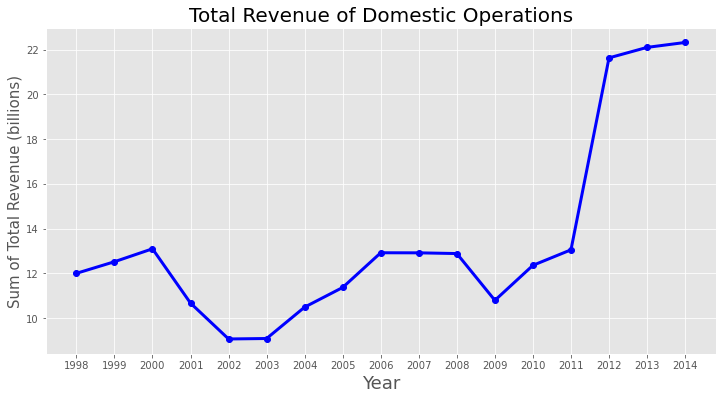

In [25]:
plt.style.use('ggplot')
fig, ax_1 = plt.subplots(figsize=(12,6))

ax_1.plot(years, domestic_2000_L_billions, color='b', marker = '.', linewidth=3, markersize=12)
ax_1.set_xticks(years)
ax_1.set_title('Total Revenue of Domestic Operations', fontsize = 20)
ax_1.set_xlabel('Year', fontsize = 18)
ax_1.set_ylabel('Sum of Total Revenue (billions)', fontsize = 15)

Text(0, 0.5, 'Sum of Total Revenue ($Billions)')

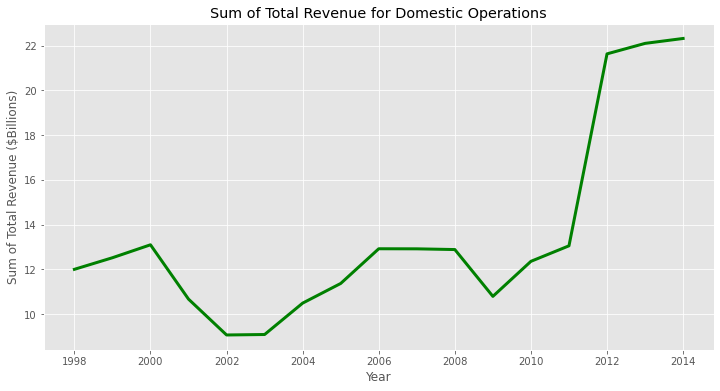

In [10]:
plt.style.use('ggplot')
fig, ax_1 = plt.subplots(figsize=(12,6))

ax_1.plot(years, domestic_2000_L_billions, color='g', linewidth=3)
ax_1.set_title('Sum of Total Revenue for Domestic Operations')
ax_1.set_xlabel('Year')
ax_1.set_ylabel('Sum of Total Revenue ($Billions)')
#BAR CHART ZOOMED IN ON RECESSION

In [11]:
#4
operating_statistics_DF = spark.read.csv(('data/united_airlines_aircraft_operating_statistics_actuals.csv'), header = True, inferSchema = True)
# prints the schema

# some functions are still valid
print("line count: {}\n".format(operating_statistics_DF.count()))

# show the table in a oh-so-nice format

line count: 269



In [12]:
operating_statistics_P = operating_statistics_DF.toPandas()
operating_statistics_P

,column_a,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Small Narrowbodies,2326550.0,2566989.0,2710156.0,2679390.0,2854374.0,3312501.0,3452306.0,2762638.0,2401097.0,...,3023429.0,3139163.0,3721438.0,1989693.0,2188491.91,2536421.00,3544397.0,3296734.51,3200530.98,2409721.70
1,Pilots (000),583404.0,627762.0,669258.0,689224.0,728240.0,838740.0,999164.0,897116.0,634961.0,...,438619.0,435275.0,435110.0,374621.0,329333.59,306357.47,467634.0,548758.78,605357.32,589163.49
2,Salaries and Wages (000),432613.0,469059.0,515538.0,508323.0,533546.0,605325.0,649540.0,563728.0,370899.0,...,277744.0,275166.0,274264.0,228164.0,208150.13,211297.10,314467.0,369108.23,407587.82,413252.37
3,Pilot Training (000),28235.0,22388.0,23838.0,22037.0,25315.0,25163.0,29921.0,22831.0,11309.0,...,8183.0,9754.0,7933.0,8636.0,4046.47,3819.94,3089.0,9020.15,9872.87,14025.71
4,Benefits and Payroll Taxes (000),77752.0,87128.0,77679.0,105045.0,108242.0,143949.0,247814.0,257181.0,213327.0,...,114430.0,109587.0,113649.0,107956.0,90692.86,66375.60,131097.0,132366.29,131194.67,131049.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Sum of Burden,760313.0,825732.0,931612.0,933112.0,964000.0,1004911.0,1044600.0,901684.0,755000.0,...,600185.0,628291.0,587008.0,499071.0,448996.47,555396.33,814727.0,667608.60,686256.75,700559.27
265,Sum of Aircraft Ownership,1538751.0,1521665.0,1466284.0,1463948.0,1475927.0,1618830.0,1627654.0,1502408.0,1251966.0,...,925872.0,946009.0,937299.0,884359.0,775444.06,427140.62,895852.0,836447.00,789911.67,696905.25
266,Sum of Rentals,1009470.0,954604.0,941613.0,895141.0,878627.0,923211.0,858353.0,855526.0,633630.0,...,416323.0,410374.0,402996.0,348709.0,325719.17,322709.35,785504.0,727582.55,686943.63,587282.69
267,Sum of Depreciation and Amortization,529281.0,567061.0,524671.0,568807.0,597300.0,695619.0,769301.0,646882.0,618336.0,...,509549.0,535635.0,534303.0,535650.0,449724.89,104431.27,110348.0,108864.45,102968.04,109622.56


In [13]:
operating_statistics_DF.createOrReplaceTempView('Operating_Statistics')

#spark.sql('SELECT text, place.country FROM Tweets LIMIT 50').show()
traffic_capacity_SQLP = spark.sql("""SELECT * FROM Operating_Statistics WHERE column_a like '%Airborne%'""").toPandas()

employee_SQLP = spark.sql("""SELECT * FROM Operating_Statistics WHERE column_a like '%Training%'""").toPandas()
employee_SQLP

,column_a,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Pilot Training (000),28235.0,22388.0,23838.0,22037.0,25315.0,25163.0,29921.0,22831.0,11309.0,...,8183.0,9754.0,7933.0,8636.0,4046.47,3819.94,3089.0,9020.15,9872.87,14025.71
1,Pilot Training (000),9579.0,7964.0,9618.0,7946.0,9301.0,8862.0,8983.0,9137.0,6447.0,...,2725.0,4185.0,3613.0,4335.0,3089.78,3255.42,3566.0,4874.69,25312.69,39518.96
2,Pilot Training (000),20517.0,17668.0,21389.0,20601.0,25290.0,25804.0,30837.0,28822.0,16744.0,...,6155.0,7241.0,7952.0,10359.0,6870.52,8539.00,11528.0,16484.63,24410.74,39720.90
3,Pilot Training (000),58331.0,48020.0,54845.0,50584.0,59906.0,59829.0,69741.0,60790.0,34500.0,...,17063.0,21180.0,19498.0,23330.0,14006.77,15614.36,18183.0,30379.47,59596.30,93265.57
4,Sum of Pilot Training,28235.0,22388.0,23838.0,22037.0,25315.0,25163.0,29921.0,22831.0,11309.0,...,8183.0,9754.0,7933.0,8636.0,4046.47,3819.94,3089.0,9020.15,9872.87,14025.71
5,Sum of Pilot Training,9579.0,7964.0,9618.0,7946.0,9301.0,8862.0,8983.0,9137.0,6447.0,...,2725.0,4185.0,3613.0,4335.0,3089.78,3255.42,3566.0,4874.69,25312.69,39518.96
6,Sum of Pilot Training,20517.0,17668.0,21389.0,20601.0,25290.0,25804.0,30837.0,28822.0,16744.0,...,6155.0,7241.0,7952.0,10359.0,6870.52,8539.00,11528.0,16484.63,24410.74,39720.90
7,Sum of Pilot Training,58331.0,48020.0,54845.0,50584.0,59906.0,59829.0,69741.0,60790.0,34500.0,...,17063.0,21180.0,19498.0,23330.0,14006.77,15614.36,18183.0,30379.47,59596.30,93265.57


In [14]:
employee_P = employee_SQLP.iloc[7:]
employee_2000 = employee_P.loc[:,'1998':'2014']
#SUM OF Pilot Training
employee_2000

employee_2000_L = employee_2000.values.tolist()
employee_2000_L = employee_2000_L[0]
employee_2000_L

[50584.0,
 59906.0,
 59829.0,
 69741.0,
 60790.0,
 34500.0,
 25884.0,
 21816.0,
 17063.0,
 21180.0,
 19498.0,
 23330.0,
 14006.77,
 15614.360000000002,
 18183.0,
 30379.47,
 59596.29999999999]

In [15]:
#Increase
increase_rev = domestic_2000_L_billions[-6:]

increase_employee = employee_2000_L[-6:]

percent_inc_rev = ((increase_rev[-1] - increase_rev[0]) / increase_rev[0]) * 100

percent_inc_emp = ((increase_employee[-1] - increase_employee[0]) / increase_employee[0]) * 100

print(increase_rev, '\n','\n', increase_employee)
print('\n')
print(percent_inc_rev, '\n','\n', percent_inc_emp)

Ratio_2014 = increase_rev[-1] / 

SyntaxError: invalid syntax (<ipython-input-15-7c21db07e26a>, line 14)

Text(0, 0.5, 'Sum of Pilot Training (millions)')

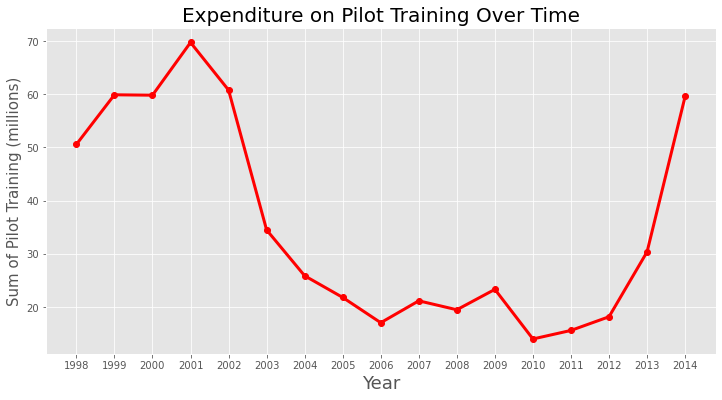

In [23]:
employee_millions = []
for i in employee_2000_L:
    employee_millions.append(i/1000)

plt.style.use('ggplot')


fig, ax_2 = plt.subplots(figsize=(12,6))
#domestic_2000_P.plot(kind='line', x='Year', y='Sum of Total Revenue ($1000s)')

ax_2.plot(years, employee_millions, color='r', marker = '.', linewidth=3, markersize=12, label = 'Pilot Training')
ax_2.set_xticks(years)
ax_2.set_title('Expenditure on Pilot Training Over Time', fontsize = 20)
ax_2.set_xlabel('Year', fontsize = 18)
ax_2.set_ylabel('Sum of Pilot Training (millions)', fontsize = 15)

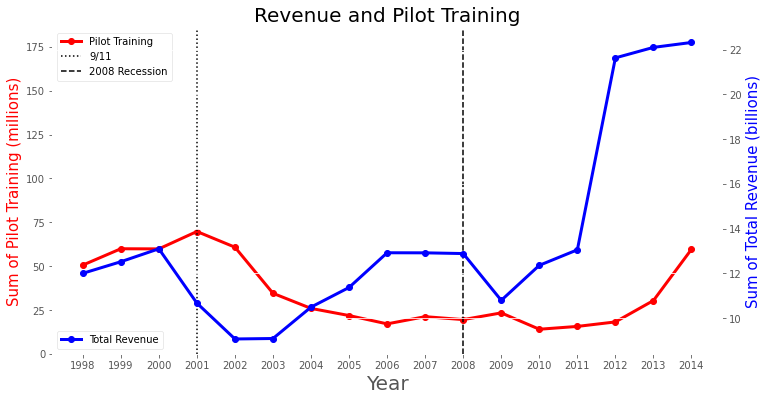

In [30]:
plt.style.use('ggplot')
plt.rcParams['axes.facecolor'] = 'white'

fig, ax_2 = plt.subplots(figsize=(12,6))
#domestic_2000_P.plot(kind='line', x='Year', y='Sum of Total Revenue ($1000s)')

ax_2.plot(years, employee_millions, color='r', marker = '.', linewidth=3, markersize=12, label = 'Pilot Training')
ax_2.set_xticks(years)
ax_2.set_title('Revenue and Pilot Training', fontsize = 20)
ax_2.set_xlabel('Year', fontsize = 20)
ax_2.set_ylabel('Sum of Pilot Training (millions)', fontsize = 15, color = 'r')

ax_both = ax_2.twinx()
ax_both.plot(years, domestic_2000_L_billions, color='b', marker = '.', linewidth=3, markersize=12, label = 'Total Revenue')
ax_2.set_ylim(0,186)
ax_2.axvline(x=2001, color ='k', linestyle = ':', label = '9/11')
ax_2.axvline(x=2008, color ='k', linestyle = '--', label = '2008 Recession')
ax_2.legend(loc='upper left')
ax_both.legend(loc='lower left')
ax_both.set_ylabel('Sum of Total Revenue (billions)', fontsize = 15, color = 'b')

fig.savefig('twins.png')
#ax_2.text(x,y,'Percent Increase')

#color code y axis, add legend, line styles different, 

In [73]:
ax_both = ax_2.twinx()
ax_both.plot(years, domestic_2000_L_billions, color='b', marker = '.', linewidth=3, markersize=12)
ax_both

<AxesSubplot:label='e1c6164c-e1ee-44dc-ad27-184b74b9ac7d'>

In [45]:
## traffic_capacity_SQLP_AVG = spark.sql("""SELECT * FROM Operating_Statistics WHERE column_a like '%Airborne%'""").toPandas()

#employee_SQLP_AVG = spark.sql("""SELECT column_a, avg(1998,1999,2000,2001,2002,2003,2004,2005,2006) FROM Operating_Statistics WHERE column_a like '%Training%' group by column_a""").toPandas()
traffic_capacity_SQLP

,column_a,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Airborne Hours,7.752567e+00,7.875218e+00,8.011161e+00,8.166800e+00,8.242893e+00,8.096276e+00,7.666690e+00,7.513406e+00,8.259434e+00,...,1.021093e+01,1.069021e+01,9.972946e+00,1.026131e+01,1.049516e+01,1.042008e+01,1.003039e+01,1.010785e+01,9.663956e+00,9.178059e+00
1,Airborne Hours,9.318120e+05,9.581620e+05,9.696950e+05,9.684110e+05,1.010521e+06,1.028648e+06,9.774110e+05,8.311630e+05,9.188620e+05,...,9.168600e+05,9.332770e+05,8.449180e+05,6.466470e+05,5.838880e+05,5.781060e+05,7.615570e+05,7.012020e+05,6.631310e+05,6.368380e+05
2,Airborne Hours,9.361301e+00,9.635607e+00,9.850673e+00,9.979463e+00,9.766550e+00,9.420904e+00,8.848694e+00,8.713475e+00,8.377046e+00,...,1.116235e+01,1.098215e+01,1.049891e+01,1.033613e+01,1.041167e+01,9.645044e+00,1.032617e+01,1.013507e+01,1.026231e+01,1.047027e+01
3,Airborne Hours,3.006850e+05,3.160190e+05,3.312880e+05,3.484030e+05,3.489100e+05,3.379090e+05,3.159780e+05,3.085180e+05,2.948050e+05,...,3.952030e+05,3.888230e+05,3.716090e+05,3.647000e+05,3.658140e+05,3.361780e+05,1.269913e+06,1.301231e+06,1.312488e+06,1.341974e+06
4,Airborne Hours,1.069740e+01,1.053422e+01,1.063182e+01,1.078776e+01,1.096359e+01,1.089559e+01,1.070207e+01,9.662793e+00,8.150759e+00,...,1.199204e+01,1.242916e+01,1.246012e+01,1.211904e+01,1.223645e+01,1.214932e+01,1.225582e+01,1.164730e+01,1.170819e+01,1.165001e+01
5,Airborne Hours,5.286870e+05,5.352120e+05,5.641560e+05,6.013420e+05,6.128320e+05,6.227590e+05,5.861950e+05,5.512430e+05,4.454390e+05,...,5.121200e+05,5.307500e+05,5.279600e+05,4.987590e+05,4.990270e+05,4.922420e+05,6.899780e+05,6.641990e+05,6.788410e+05,7.102430e+05
6,Airborne Hours,8.730142e+00,8.814612e+00,8.978367e+00,9.167516e+00,9.206932e+00,9.039182e+00,8.623092e+00,8.326435e+00,8.250482e+00,...,1.086457e+01,1.120163e+01,1.073610e+01,1.082847e+01,1.101268e+01,1.074907e+01,1.066386e+01,1.046612e+01,1.043039e+01,1.040165e+01
7,Airborne Hours,1.761184e+06,1.809393e+06,1.865139e+06,1.918156e+06,1.972263e+06,1.989316e+06,1.879584e+06,1.690924e+06,1.659106e+06,...,1.824183e+06,1.852850e+06,1.744487e+06,1.510106e+06,1.448729e+06,1.406526e+06,2.721448e+06,2.666632e+06,2.654460e+06,2.689055e+06
8,Sum of Airborne Hours,9.318120e+05,9.581620e+05,9.696950e+05,9.684110e+05,1.010521e+06,1.028648e+06,9.774110e+05,8.311630e+05,9.188620e+05,...,9.168600e+05,9.332770e+05,8.449180e+05,6.466470e+05,5.838880e+05,5.781060e+05,7.615570e+05,7.012020e+05,6.631310e+05,6.368380e+05
9,Sum of Airborne Hours,3.006850e+05,3.160190e+05,3.312880e+05,3.484030e+05,3.489100e+05,3.379090e+05,3.159780e+05,3.085180e+05,2.948050e+05,...,3.952030e+05,3.888230e+05,3.716090e+05,3.647000e+05,3.658140e+05,3.361780e+05,1.269913e+06,1.301231e+06,1.312488e+06,1.341974e+06


In [46]:
pilot_training = []
for i in range(5):
    pilot_P = employee_SQLP.iloc[i:i+1]
    pilot_P_2000 = pilot_P.loc[:,'1998':'2006']
    employee_2000_L = employee_2000.values.tolist()
    pilot_training.append(employee_2000_L[0])
    
pilot_training

concat = []
for i in range(len(pilot_training[0])+1):
        concat.append(pilot_training[0][i]+pilot_training[1][i]+pilot_training[2][i]+pilot_training[2][i])
        
concat

IndexError: list index out of range

In [111]:
employee_P_1 = employee_SQLP.iloc[0:1]
employee_2000_1 = employee_P_1.loc[:,'1998':'2006']
#SUM OF Pilot Training
employee_2000_1

employee_2000_1 = employee_2000_1.values.tolist()
employee_2000_1 = employee_2000_1[0]
employee_2000_1

#

employee_P_2 = employee_SQLP.iloc[1:2]
employee_2000_2 = employee_P_2.loc[:,'1998':'2006']
#SUM OF Pilot Training
employee_2000_2

employee_2000_2 = employee_2000_2.values.tolist()
employee_2000_2 = employee_2000_2[0]
employee_2000_2

#

employee_P_3 = employee_SQLP.iloc[2:3]
employee_2000_3 = employee_P_3.loc[:,'1998':'2006']
#SUM OF Pilot Training
employee_2000_3

employee_2000_3 = employee_2000_3.values.tolist()
employee_2000_3 = employee_2000_3[0]
employee_2000_3

#

employee_P_4 = employee_SQLP.iloc[3:4]
employee_2000_4 = employee_P_4.loc[:,'1998':'2006']
#SUM OF Pilot Training
employee_2000_4

employee_2000_4 = employee_2000_4.values.tolist()
employee_2000_4 = employee_2000_4[0]
employee_2000_4

#

concat = []

for i in range(len(employee_2000_4)):
    concat.append((employee_2000_1[i]+employee_2000_2[i]+employee_2000_3[i]+employee_2000_4[i])/4)
    
concat

[25292.0,
 29953.0,
 29914.5,
 34870.5,
 30395.0,
 17250.0,
 12942.0,
 10908.0,
 8531.5]

Text(0, 0.5, 'Sum of Total Revenue ($1000s)')

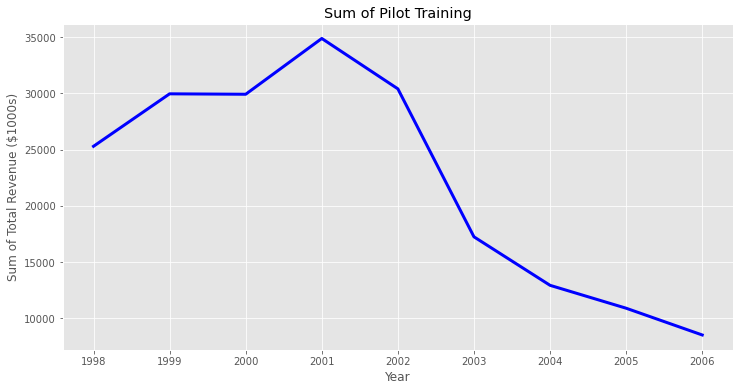

In [112]:
plt.style.use('ggplot')
fig, ax_3 = plt.subplots(figsize=(12,6))
#domestic_2000_P.plot(kind='line', x='Year', y='Sum of Total Revenue ($1000s)')

ax_3.plot(years, concat, color='b', linewidth=3)
ax_3.set_title('Sum of Pilot Training')
ax_3.set_xlabel('Year')
ax_3.set_ylabel('Sum of Pilot Training')

In [119]:
traffic_capacity_SQLP

,column_a,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Airborne Hours,7.752567e+00,7.875218e+00,8.011161e+00,8.166800e+00,8.242893e+00,8.096276e+00,7.666690e+00,7.513406e+00,8.259434e+00,...,1.021093e+01,1.069021e+01,9.972946e+00,1.026131e+01,1.049516e+01,1.042008e+01,1.003039e+01,1.010785e+01,9.663956e+00,9.178059e+00
1,Airborne Hours,9.318120e+05,9.581620e+05,9.696950e+05,9.684110e+05,1.010521e+06,1.028648e+06,9.774110e+05,8.311630e+05,9.188620e+05,...,9.168600e+05,9.332770e+05,8.449180e+05,6.466470e+05,5.838880e+05,5.781060e+05,7.615570e+05,7.012020e+05,6.631310e+05,6.368380e+05
2,Airborne Hours,9.361301e+00,9.635607e+00,9.850673e+00,9.979463e+00,9.766550e+00,9.420904e+00,8.848694e+00,8.713475e+00,8.377046e+00,...,1.116235e+01,1.098215e+01,1.049891e+01,1.033613e+01,1.041167e+01,9.645044e+00,1.032617e+01,1.013507e+01,1.026231e+01,1.047027e+01
3,Airborne Hours,3.006850e+05,3.160190e+05,3.312880e+05,3.484030e+05,3.489100e+05,3.379090e+05,3.159780e+05,3.085180e+05,2.948050e+05,...,3.952030e+05,3.888230e+05,3.716090e+05,3.647000e+05,3.658140e+05,3.361780e+05,1.269913e+06,1.301231e+06,1.312488e+06,1.341974e+06
4,Airborne Hours,1.069740e+01,1.053422e+01,1.063182e+01,1.078776e+01,1.096359e+01,1.089559e+01,1.070207e+01,9.662793e+00,8.150759e+00,...,1.199204e+01,1.242916e+01,1.246012e+01,1.211904e+01,1.223645e+01,1.214932e+01,1.225582e+01,1.164730e+01,1.170819e+01,1.165001e+01
5,Airborne Hours,5.286870e+05,5.352120e+05,5.641560e+05,6.013420e+05,6.128320e+05,6.227590e+05,5.861950e+05,5.512430e+05,4.454390e+05,...,5.121200e+05,5.307500e+05,5.279600e+05,4.987590e+05,4.990270e+05,4.922420e+05,6.899780e+05,6.641990e+05,6.788410e+05,7.102430e+05
6,Airborne Hours,8.730142e+00,8.814612e+00,8.978367e+00,9.167516e+00,9.206932e+00,9.039182e+00,8.623092e+00,8.326435e+00,8.250482e+00,...,1.086457e+01,1.120163e+01,1.073610e+01,1.082847e+01,1.101268e+01,1.074907e+01,1.066386e+01,1.046612e+01,1.043039e+01,1.040165e+01
7,Airborne Hours,1.761184e+06,1.809393e+06,1.865139e+06,1.918156e+06,1.972263e+06,1.989316e+06,1.879584e+06,1.690924e+06,1.659106e+06,...,1.824183e+06,1.852850e+06,1.744487e+06,1.510106e+06,1.448729e+06,1.406526e+06,2.721448e+06,2.666632e+06,2.654460e+06,2.689055e+06
8,Sum of Airborne Hours,9.318120e+05,9.581620e+05,9.696950e+05,9.684110e+05,1.010521e+06,1.028648e+06,9.774110e+05,8.311630e+05,9.188620e+05,...,9.168600e+05,9.332770e+05,8.449180e+05,6.466470e+05,5.838880e+05,5.781060e+05,7.615570e+05,7.012020e+05,6.631310e+05,6.368380e+05
9,Sum of Airborne Hours,3.006850e+05,3.160190e+05,3.312880e+05,3.484030e+05,3.489100e+05,3.379090e+05,3.159780e+05,3.085180e+05,2.948050e+05,...,3.952030e+05,3.888230e+05,3.716090e+05,3.647000e+05,3.658140e+05,3.361780e+05,1.269913e+06,1.301231e+06,1.312488e+06,1.341974e+06


In [126]:
airborne = []
for i in range(8):
    airborne_P = traffic_capacity_SQLP.iloc[i:i+1]
    traffic_capacity_SQLP_2000 = airborne_P.loc[:,'1998':'2006']
    traffic_capacity_SQLP_2000_L = traffic_capacity_SQLP_2000.values.tolist()
    airborne.append(traffic_capacity_SQLP_2000_L[0])
    

concat_2 = []
for i in range(len(airborne[0])):
        concat_2.append((airborne[0][i]+airborne[1][i]+airborne[2][i]+airborne[3][i]+airborne[4][i]+airborne[5][i]+airborne[6][i]+airborne[7][i])/8)
        
concat_2

[479543.7626920927,
 493070.52249615325,
 497333.6814934439,
 469900.4800678177,
 422735.277013473,
 414780.6297151714,
 413019.8925904596,
 397980.81001799495,
 456051.2787362617]

Text(0, 0.5, 'Average of Airborne Time')

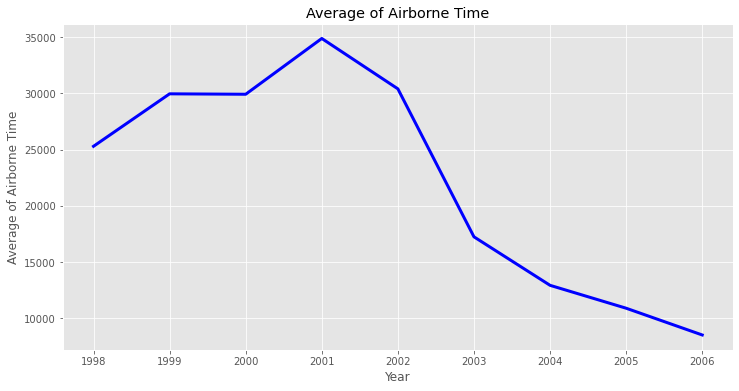

In [127]:
plt.style.use('ggplot')
fig, ax_4 = plt.subplots(figsize=(12,6))
#domestic_2000_P.plot(kind='line', x='Year', y='Sum of Total Revenue ($1000s)')

ax_4.plot(years, concat, color='b', linewidth=3)
ax_4.set_title('Average of Airborne Time')
ax_4.set_xlabel('Year')
ax_4.set_ylabel('Average of Airborne Time')

In [ ]:
# X AND Y LABELS LARGER
# USE COLORS AS ATTRIBUTE LAYERS
# TIME SERIES SHOULD HAVE DIFFERENT COLORS THAN REVENUE / LINE WIDTH
# 

In [131]:
ratio = []

for p, r in zip(employee_2000_L, domestic_2000_L_billions):
    ratio.append((p*1000)/(r*10**8)*100)
    
ratio

[4.216524501505008,
 4.786706848604036,
 4.569255855645454,
 6.539583274922708,
 6.708705237546546,
 3.798649134304378,
 2.4684197431237527,
 1.9195739348326821,
 1.321006315250961,
 1.6402018269122427,
 1.5137058777405739,
 2.1625626023868647,
 1.1337448294858468,
 1.1966656999551537,
 0.8405909405626898,
 1.374638403781169,
 2.6700860453835875]

Text(0, 0.5, 'Ratio of Employee Training to Total Revenue')

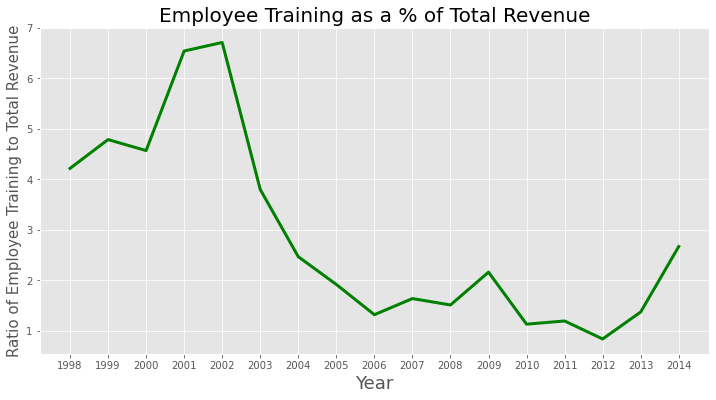

In [136]:
plt.style.use('ggplot')
fig, ax_5 = plt.subplots(figsize=(12,6))
#domestic_2000_P.plot(kind='line', x='Year', y='Sum of Total Revenue ($1000s)')

ax_5.plot(years, ratio, color='g', linewidth=3)
ax_5.set_xticks(years)
ax_5.set_title('Employee Training as a % of Total Revenue', fontsize = 20)
ax_5.set_xlabel('Year', fontsize = 18)
ax_5.set_ylabel('Ratio of Employee Training to Total Revenue', fontsize = 15)